In [1]:
import sys
import numpy as np
import pandas as pd
from collections import defaultdict
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests
from tqdm import tqdm
import matplotlib.pyplot as plt

In [4]:
BasePath = "/Users/yungi/Documents/Dataset/"
result = pd.read_csv(os.path.join(BasePath, "물품2.csv"), encoding='utf-8')
result.head()

/Users/yungi/anaconda3/envs/pps_contest/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3186: DtypeWarning: Columns (2,6,9,10,15,19,20,21,34,36,40,41,44) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,등록유형,조달구분,공고시스템명,계약구분,계약번호,계약변경차수,최종계약여부,수요기관명,수요기관코드,수요기관구분,...,추정가격,예정가격,입찰계약방법,낙찰자결정방법,초년도계약번호,장기계약차수,장기계속계약여부,계약지청명,낙찰업체투찰금액,낙찰업체투찰률
0,나라장터(G2B),중앙조달,NaN,제3자단가,241930033,4,N,각 수요기관,ZZ99999,기타기관,...,4.363636e+11,0.0,일반(3자단가)다수공급자물품계약,다수공급자계약에의한 낙찰자 결정,NaN,NaN,N,광주지방조달청,NaN,NaN
1,나라장터(G2B),자체조달,NaN,총액계약,20201111DB2,1,Y,대구광역시남부교육청 대구송현초등학교,7270077,교육기관,...,3.438181e+06,3768900.0,수의(총액)소액수의,제한적최저가(낙찰하한율),NaN,NaN,N,NaN,3393300.0,90.034
2,나라장터(G2B),자체조달,NaN,총액계약,2020110E1CA,1,N,강원도 고성군,4340000,지자체,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,나라장터(G2B),자체조달,NaN,총액계약,20201111C23,1,Y,대구광역시교육청 대구외국어고등학교,7240063,교육기관,...,9.392000e+06,9342200.0,수의(총액)소액수의,제한적최저가(낙찰하한율),NaN,NaN,N,NaN,8408760.0,90.008
4,나라장터(G2B),자체조달,NaN,총액계약,20201106EDF,0,Y,경기도교육청 경기도구리남양주교육지원청 창현초등학교,7652125,교육기관,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [10]:
result.index = result['계약일자'].agg(lambda x: int(''.join(list(str(x))[:4])))

In [641]:
def FloatToInt(dataframe, colist):
    dataframe[colist] = dataframe[colist].astype(np.int64)
    return dataframe

In [634]:
test = pd.read_csv("/Users/yungi/Documents/Dataset/조달기업별_실적_202012.csv", encoding='utf-8')
targetG = GpassComp[(GpassComp['시작일자'].apply(lambda x: int("".join(x.split('-')[:2]))) <= 202111) & (GpassComp['종료일자'].apply(lambda x: int("".join(x.split('-')[:2]))) >= 202211)]['업체명'].values
target = test[test['업체명'].isin(targetG)]
GCompCnt = pd.DataFrame(target['업체명'].value_counts())
targetG = test[test['업체명'].isin(GCompCnt[GCompCnt['업체명']==1].index)]['업체명'].values

In [30]:
Period = [202101, 202102, 202103, 202104, 202105, 202106, 202107, 202108, 202109, 202110, 202111]
targetG_df = pd.DataFrame()
for i, p in enumerate(Period):
    
    dataset = pd.read_csv("/Users/yungi/Documents/Dataset/조달기업별_실적_{}.csv".format(str(p)), encoding='utf-8')
    target = dataset[dataset['업체명'].isin(targetG[:50])].reset_index(drop=True)
    target = FloatToInt(target.loc[:, ['당년총금액']], ['당년총금액']).rename(columns={'당년총금액':str(p)})
    targetG_df = pd.concat([targetG_df, target], axis=1, ignore_index=True)

targetG_df = targetG_df.dropna()

NameError: name 'targetG' is not defined

In [725]:
targetG_df = FloatToInt(targetG_df, [0, 1])

In [738]:
test = targetG_df.drop([19, 32, 33]).reset_index(drop=True)

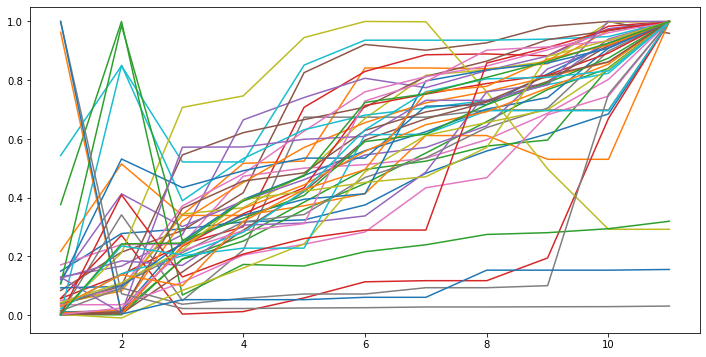

In [742]:
fig, ax = plt.subplots(facecolor='w', figsize=(12, 6))
for i in range(test.shape[0]):
    NormCost = test.iloc[i, ].values / max(test.iloc[i, ].values)
    ax.plot(range(1, 12), NormCost)

plt.show()

In [79]:
items_dataset = pd.read_csv("조달기업별+업무대상별+실적(00126)_20220205043312.csv")

In [33]:
BasePath = "/Users/yungi/Documents/Dataset/"
os.listdir(BasePath)

['장애인기업목록_업체명+생산품목+주업종.csv',
 '조달기업별_실적_202012.csv',
 '20220204_GPASS기업목록.csv',
 '.DS_Store',
 '조달기업별_실적_202104.csv',
 '조달기업별_실적_202110.csv',
 '조달기업별_실적_202111.csv',
 '조달기업별_실적_202105.csv',
 '조달기업별_실적_202107.csv',
 '조달기업별_실적_202106.csv',
 '조달기업별_실적_202102.csv',
 '조달기업별_실적_202103.csv',
 '조달기업별_실적_202101.csv',
 '20220205기준_GPASS기업목록_업체명+시작일자+종료일자.csv',
 '조달기업별_실적_202108.csv',
 '여성기업목록_업체명+생산품목+주업종.csv',
 '조달기업별_실적_202109.csv',
 '20220213기준_GPASS기업목록_업체명+사업자번호+시작일자+종료일자.csv']

In [35]:
test = pd.read_csv(os.path.join(BasePath, "조달기업별_실적_202111.csv"))

In [44]:
test[~test['업체명'].isin(gpass['업체명'])].sort_values(by='증감금액', ascending=False)

,업체명,전년총건수,전년총금액,당년총건수,당년총금액,증감건수,증감금액
206449,바르다김선생,0,0.0,2,1.232490e+06,_,_
250999,서울더원플러스치과,0,0.0,1,1.193200e+06,_,_
251008,서울도봉양말협동조합,0,0.0,2,3.639000e+05,_,_
251007,서울도료,0,0.0,2,2.496000e+05,_,_
251006,서울도료,1,3000000.0,0,0.000000e+00,_,_
...,...,...,...,...,...,...,...
243273,삼호환경(주),1,500.0,0,7.199000e+06,_,###########
34909,(주)중앙에너지산업,1,2430.0,2,2.140815e+08,100.00,###########
461501,주식회사 중정공영,0,-48650.0,2,1.391518e+09,_,###########
90012,그린가스텍 주식회사,1,848.0,16,9.466727e+07,"1,500.00",###########


In [36]:
test

,업체명,전년총건수,전년총금액,당년총건수,당년총금액,증감건수,증감금액
0,전체,7487450,1.416620e+14,8399340,1.491551e+14,12.18,5.29
1,(사)울산민주화운동기념계승사업회,0,0.000000e+00,1,5.200000e+06,_,_
2,NC경산점,2,2.637300e+05,6,2.610100e+06,200.00,889.69
3,성산OK마트,4,8.950000e+05,1,5.700000e+05,-75.00,-36.31
4,세무법인참길,0,0.000000e+00,1,3.500000e+06,_,_
...,...,...,...,...,...,...,...
597831,協成化學 株式會社,0,0.000000e+00,1,4.488000e+06,_,_
597832,協盛機械設備 株式會社 (협성기계설비주식회사),5,2.381150e+08,6,1.139239e+08,20.00,-52.16
597833,和道 農業協同組合,10,9.367000e+05,0,0.000000e+00,_,_
597834,"花요일엔, 꽃",5,1.231000e+06,12,6.075390e+06,140.00,393.53


In [588]:
GpassComp = pd.read_csv("/Users/yungi/Documents/Dataset/20220205기준_GPASS기업목록_업체명+시작일자+종료일자.csv")

In [ ]:
WomanComp = pd.read_csv("/Users/yungi/Documents/Dataset/여성기업목록_업체명+생산품목+주업종.csv")
DisableComp = pd.read_csv("/Users/yungi/Documents/Dataset/장애인기업목록_업체명+생산품목+주업종.csv")

In [81]:
dataset

,업체명,전년총건수,전년총금액,당년총건수,당년총금액,증감건수,증감금액
0,전체,7487450,1.416620e+14,8399340,1.491551e+14,12.18,5.29
1,(사)울산민주화운동기념계승사업회,0,0.000000e+00,1,5.200000e+06,_,_
2,NC경산점,2,2.637300e+05,6,2.610100e+06,200.00,889.69
3,성산OK마트,4,8.950000e+05,1,5.700000e+05,-75.00,-36.31
4,세무법인참길,0,0.000000e+00,1,3.500000e+06,_,_
...,...,...,...,...,...,...,...
597831,協成化學 株式會社,0,0.000000e+00,1,4.488000e+06,_,_
597832,協盛機械設備 株式會社 (협성기계설비주식회사),5,2.381150e+08,6,1.139239e+08,20.00,-52.16
597833,和道 農業協同組合,10,9.367000e+05,0,0.000000e+00,_,_
597834,"花요일엔, 꽃",5,1.231000e+06,12,6.075390e+06,140.00,393.53


In [61]:
dataset.columns

Index(['업체명', '전년총건수', '전년총금액', '당년총건수', '당년총금액', '증감건수', '증감금액'], dtype='object')

In [62]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597836 entries, 0 to 597835
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   업체명     597836 non-null  object 
 1   전년총건수   597836 non-null  int64  
 2   전년총금액   597836 non-null  float64
 3   당년총건수   597836 non-null  int64  
 4   당년총금액   597836 non-null  float64
 5   증감건수    597836 non-null  object 
 6   증감금액    597836 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 31.9+ MB


In [93]:
dataset[dataset['업체명'].str.contains('케이에스아이')]

,업체명,전년총건수,전년총금액,당년총건수,당년총금액,증감건수,증감금액
441099,주식회사 씨케이에스아이,3,6.464500e+07,5,3.404500e+07,66.67,-47.34
465808,주식회사 케이에스아이,219,5.671419e+09,250,5.775133e+09,14.16,1.83
517101,케이에스아이,5,2.570000e+06,4,2.832000e+06,-20.00,10.19
517102,케이에스아이(KSI),0,0.000000e+00,1,3.000000e+06,_,_
517103,케이에스아이디주식회사,3,7.370109e+07,4,1.219683e+08,33.33,65.49
517104,케이에스아이주식회사,18,6.450483e+09,13,8.400862e+09,-27.78,30.24


In [82]:
pd.merge(dataset, items_dataset, on=['업체명'], how='inner')

,업체명,전년총건수,전년총금액,당년총건수,당년총금액,증감건수,증감금액,합계건수,합계금액,물품건수,물품금액,공사건수,공사금액,일반용역건수,일반용역금액,기술용역건수,기술용역금액
0,전체,7487450,1.416620e+14,8399340,1.491551e+14,12.18,5.29,1081592,1.388657e+13,918172,7.325309e+12,70838,4497503153959,81356,1441158629194,11226,622602785409
1,성산OK마트,4,8.950000e+05,1,5.700000e+05,-75.00,-36.31,1,5.700000e+05,1,5.700000e+05,0,0,0,0,0,0
2,&#54997; 클리닉(Hoof Clinic),0,0.000000e+00,9,5.747500e+07,_,_,2,4.048000e+06,1,2.024000e+06,0,0,1,2024000,0,0
3,( 주)태광이엔씨,49,4.780276e+08,35,3.425502e+08,-28.57,-28.34,4,1.991600e+07,1,5.500000e+05,3,19366000,0,0,0,0
4,(#)뜨락,0,0.000000e+00,1,4.950000e+05,_,_,1,4.950000e+05,1,4.950000e+05,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555645,合資會社 長安電氣,3,3.230000e+07,5,3.272630e+08,66.67,913.20,1,1.200300e+07,0,0.000000e+00,1,12003000,0,0,0,0
555646,陜川畜産業協同組合,188,2.653520e+08,7,4.214075e+07,-96.28,-84.12,1,8.600000e+03,1,8.600000e+03,0,0,0,0,0,0
555647,炫盛電氣 株式會社,1,4.181178e+07,1,3.039356e+08,0.00,626.91,1,3.039356e+08,0,0.000000e+00,1,303935640,0,0,0,0
555648,協盛機械設備 株式會社 (협성기계설비주식회사),5,2.381150e+08,6,1.139239e+08,20.00,-52.16,1,1.070000e+07,0,0.000000e+00,1,10700000,0,0,0,0


In [25]:
GPassList = defaultdict(list)
for page_no in tqdm(range(1, 104)):
    data = {'pageIndex': page_no}

    # 일반적으로 활용하는 requests.get()도 사용가능하다. 다만, pageIndex관련 dict은 params라는 argument로 넘겨줘야 한다. (..., params=data)
    gpass = requests.post("https://www.globalkoreamarket.go.kr:8843/gpass/gpassCompany/listgpassCompany.do", data=data)
    gpass = BeautifulSoup(gpass.content, 'html.parser')
    for oneComp in gpass.find_all('td', 'line'):
        GPassList['업체명'].append(oneComp.contents[0].strip())

for page_no in tqdm(range(1, 104)):
    data = {'pageIndex': page_no}

    # 일반적으로 활용하는 requests.get()도 사용가능하다. 다만, pageIndex관련 dict은 params라는 argument로 넘겨줘야 한다. (..., params=data)
    gpass = requests.post("https://www.globalkoreamarket.go.kr:8843/gpass/gpassCompany/listgpassCompany.do", data=data)
    gpass = BeautifulSoup(gpass.content, 'html.parser')
    for i in range(4, len(gpass.find_all("td")), 11):
        GPassList['사업자번호'].append(gpass.find_all("td")[i].contents[0].strip())
        GPassList['시작일자'].append(gpass.find_all("td")[i+2].contents[0].strip())
        GPassList['종료일자'].append(gpass.find_all("td")[i+7].contents[0].strip())

100%|██████████| 103/103 [06:40<00:00,  3.89s/it]


In [28]:
gpass

,업체명,사업자번호,시작일자,종료일자
0,(주)우드메탈,1328128395,2014-03-27,2022-03-26
1,주식회사 토페스,2078115520,2014-03-27,2022-03-26
2,주식회사 케이에스아이,4078102931,2014-03-27,2022-03-26
3,주식회사 다빈워텍,1328179142,2014-03-27,2022-03-26
4,주식회사 디에스엘,1378141582,2014-03-27,2022-03-26
...,...,...,...,...
1016,주식회사 효신테크,1378155581,2021-12-17,2026-12-16
1017,호평중공업주식회사,4058104758,2021-12-17,2026-12-16
1018,(주)케이에스피,1288174527,2021-12-17,2026-12-16
1019,주식회사 대경산전,4028164121,2021-12-17,2026-12-16


In [29]:
gpass = pd.DataFrame(GPassList)
# gpass.to_csv("/Users/yungi/Documents/Dataset/20220213기준_GPASS기업목록_업체명+사업자번호+시작일자+종료일자.csv", index=False)

In [447]:
DisComp = defaultdict(list)
for page_no in tqdm(range(1, 11)):
    html = requests.get("https://www.dream365.or.kr/bbs/search.php?stx=&page={}".format(page_no), verify=False)
    html = BeautifulSoup(html.content, 'html.parser')

    for i in range(1, len(html.find_all("td")), 6):
        for j in range(3):
            try:
                if j == 0:
                    DisComp['업체명'].append(html.find_all("td")[i+j].contents[1])
                elif j == 1:
                    DisComp['생산품목'].append(html.find_all("td")[i+j].contents[0])
                else:
                    DisComp['주업종'].append(html.find_all("td")[i+j].contents[0])
            
            except IndexError:
                if j == 0:
                    DisComp['업체명'].append("Unknown")
                    print("업체명 Error :" + ", ".join([str(page_no),str(i),str(j)]))
                elif j == 1:
                    DisComp['생산품목'].append("Unknown")
                    print("생산품목 Error :" + ", ".join([str(page_no),str(i),str(j)]))
                else:
                    DisComp['주업종'].append("Unknown")
                    print("주업종 Error :" + ", ".join([str(page_no),str(i),str(j)]))

  0%|          | 0/10 [00:00<?, ?it/s]/Users/yungi/anaconda3/envs/pps_contest/lib/python3.7/site-packages/urllib3/connectionpool.py:1050: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.dream365.or.kr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,
 10%|█         | 1/10 [00:00<00:02,  3.03it/s]

생산품목 Error :1, 43, 1
생산품목 Error :1, 73, 1
주업종 Error :1, 73, 2


 20%|██        | 2/10 [00:00<00:02,  3.29it/s]

생산품목 Error :2, 43, 1


 30%|███       | 3/10 [00:00<00:01,  3.65it/s]

생산품목 Error :3, 25, 1
주업종 Error :3, 25, 2


 40%|████      | 4/10 [00:01<00:01,  3.79it/s]

생산품목 Error :4, 55, 1


 50%|█████     | 5/10 [00:01<00:01,  3.82it/s]

생산품목 Error :5, 49, 1


 60%|██████    | 6/10 [00:01<00:01,  3.90it/s]

생산품목 Error :6, 1, 1
주업종 Error :6, 1, 2


 70%|███████   | 7/10 [00:01<00:00,  4.06it/s]

생산품목 Error :7, 25, 1
주업종 Error :7, 49, 2


 80%|████████  | 8/10 [00:02<00:00,  3.98it/s]

생산품목 Error :8, 31, 1
생산품목 Error :8, 43, 1
주업종 Error :8, 43, 2
생산품목 Error :8, 55, 1
생산품목 Error :8, 73, 1
주업종 Error :8, 85, 2


 90%|█████████ | 9/10 [00:02<00:00,  3.77it/s]

주업종 Error :9, 61, 2


100%|██████████| 10/10 [00:02<00:00,  3.76it/s]


In [439]:
DisComp = defaultdict(list)
for page_no in tqdm(range(1, 4343)):
    html = requests.get("http://www.wbiz.or.kr/web/entsearch/BD_index.do?q_ent_name=&q_ceo_name=&q_pdt_item=&q_area_cd=&q_busi_type_nm=&q_busi_type_cd=&q_expire_yn=N&q_cancel_dt=N&q_rowPerPage=10&q_currPage={}&q_sortName=&q_sortOrder=+class%3Df_link_bu+f_l".format(page_no))
    html = BeautifulSoup(html.content, 'html.parser')
    
    for i in range(1, len(html.find_all("td")), 6):
        for j in range(0,5,2):
            try:
                if j == 0:
                    DisComp['업체명'].append(html.find_all("td")[i+j].contents[0])
                elif j == 2:
                    DisComp['주업종'].append(html.find_all("td")[i+j].contents[0])
                else:
                    DisComp['생산품목'].append(html.find_all("td")[i+j].contents[0])
            
            except IndexError:
                if j == 0:
                    DisComp['업체명'].append("Unknown")
                    # print("업체명 Error :" + ", ".join([str(page_no),str(i),str(j)]))
                elif j == 2:
                    DisComp['주업종'].append("Unknown")
                    # print("주업종 Error :" + ", ".join([str(page_no),str(i),str(j)]))
                else:
                    DisComp['생산품목'].append("Unknown")
                    # print("생산품목 Error :" + ", ".join([str(page_no),str(i),str(j)]))


100%|██████████| 4342/4342 [1:20:33<00:00,  1.11s/it]


In [543]:
target[(target['증감건수']=='_') | (target['증감금액']=='_')]

,업체명,전년총건수,전년총금액,당년총건수,당년총금액,증감건수,증감금액
42,(주)동화엔텍,4,13729416,0,0,_,_
60,(주)모피언스,0,0,5,194548000,_,_
68,(주)비스토스,0,0,1,202590300,_,_
82,(주)신산이,3,189155130,0,0,_,_
113,(주)원우이엔지,0,0,1,5280000,_,_
116,(주)윈도우코리아,0,0,7,961498430,_,_
133,(주)지넷시스템,0,0,4,199854200,_,_
160,(주)푸시풀시스템,0,0,1,162000,_,_
191,가자마 이엔티 주식회사,0,0,1,12485200,_,_
195,계백자동차 주식회사,0,0,6,755800000,_,_


In [596]:
gpass

,업체명,시작일자,종료일자
0,(주)우드메탈,2014-03-27,2022-03-26
1,주식회사 토페스,2014-03-27,2022-03-26
2,주식회사 케이에스아이,2014-03-27,2022-03-26
3,주식회사 다빈워텍,2014-03-27,2022-03-26
4,주식회사 디에스엘,2014-03-27,2022-03-26
...,...,...,...
1016,주식회사 효신테크,2021-12-17,2026-12-16
1017,호평중공업주식회사,2021-12-17,2026-12-16
1018,(주)케이에스피,2021-12-17,2026-12-16
1019,주식회사 대경산전,2021-12-17,2026-12-16


In [544]:
dataset

,업체명,전년총건수,전년총금액,당년총건수,당년총금액,증감건수,증감금액
0,전체,7487450,141662035317776,8399340,149155136217797,12.18,5.29
1,(사)울산민주화운동기념계승사업회,0,0,1,5200000,_,_
2,NC경산점,2,263730,6,2610100,200.00,889.69
3,성산OK마트,4,895000,1,570000,-75.00,-36.31
4,세무법인참길,0,0,1,3500000,_,_
...,...,...,...,...,...,...,...
597831,協成化學 株式會社,0,0,1,4488000,_,_
597832,協盛機械設備 株式會社 (협성기계설비주식회사),5,238115010,6,113923860,20.00,-52.16
597833,和道 農業協同組合,10,936700,0,0,_,_
597834,"花요일엔, 꽃",5,1231000,12,6075390,140.00,393.53
